# Posição (ou separatrizes)

## Autores

- [Italo Seara](https://github.com/italoseara)
- [Lucas Luige](https://github.com/lluigecm)
- [Gabriel Prado](https://github.com/Gabriel-Prd)

## Objetivo

Apresentar o conceito de separatrizes e suas aplicações.

## Bibliotecas utilizadas

- [Numpy](https://numpy.org/) para cálculos numéricos
- [Matplotlib](https://matplotlib.org/) para visualização de dados
- [Pandas](https://pandas.pydata.org/) para manipulação de dados

In [97]:
# Carregando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementações próprias

As implementações abaixo serão utilizadas ao longo do notebook para facilitar a visualização dos dados, transformando os dados que seriam retornados em forma de arrays em dataframes que podem ser visualizados como uma tabela. Note que não é necessário utiliza-las para fins de cálculo, apenas para visualização.

A classe `FrequencyTable` foi criada para que haja de forma similar à `fdt` da biblioteca `fdth` em R. Ela utiliza a função [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) do pandas para criar os intervalos de classe.

A função `quantile` calcula os quantis de uma amostra utilizando a função [`np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) do numpy.

In [98]:
from typing import Union


class FrequencyTable(pd.DataFrame):
    def __init__(self, f: np.array, start: float, end: float, right: bool = False) -> None:
        # Criando os intervalos
        bins = np.linspace(start, end, len(f)+1)

        # Criando a tabela de frequência
        super().__init__({}, index=pd.cut(bins[:-1], bins, right=right))

        total         = f.sum()
        self['f']     = f                         # Frequência absoluta
        self['rf']    = self['f'] / total         # Frequência relativa
        self['rf(%)'] = self['rf'] * 100          # Frequência relativa percentual
        self['cf']    = self['f'].cumsum()        # Frequência acumulada
        self['cf(%)'] = self['cf'] / total * 100  # Frequência acumulada percentual

    def quantile(self, q: Union[float, list[float], np.ndarray]) -> float | list[float]:
        if type(q) in [list, np.ndarray]:
            return [self.quantile(i) for i in q]

        if not 0 < q < 1:
            raise ValueError('`q` must be between 0 and 1')

        n   = self['f'].sum()                   # Tamanho da serie
        pos = q * n                             # Posição do percentil
        ip  = self[self['cf'] >= pos].index[0]  # Intervalo do percentil
        lpi = ip.left                           # Limite inferior da classe Pi
        lps = ip.right                          # Limite superior da classe Pi
        h   = lps - lpi                         # Amplitude da classe Pi
        sfa = sum(self[self.index < ip]['f'])   # Soma das frequências anteriores a Pi
        fpi = self.loc[ip]['f']                 # Frequência da classe Pi

        # Calculo do percentil
        return lpi + ((pos - sfa) * h) / fpi

def quantile(arr: Union[np.array, FrequencyTable], q: Union[float, list[float], np.ndarray]) -> pd.DataFrame:
    # Calcula os quantis
    quantiles = arr.quantile(q) if type(arr) == FrequencyTable else np.quantile(arr, q)

    # Retorna o resultado em formato de DataFrame
    return pd.DataFrame(
        quantiles,
        columns=['Quantis'], 
        index=[f'{round(i * 100)}%' for i in q] if type(q) in [list, np.ndarray] else [f'{q*100}%']
    )

# Quartis

## A partir de um array

In [99]:
# Criando um array com 100 valores aleatórios
k = np.random.normal(0, 1, 100)

# Calculando os quartis
quantile(k, [0.25, 0.5, 0.75])

,Quantis
25%,-0.645037
50%,-0.112139
75%,0.592879


In [100]:
# Caso queira calcular os quartis separadamente
q1 = np.quantile(k, 0.25)
q2 = np.quantile(k, 0.5)
q3 = np.quantile(k, 0.75)

q1, q2, q3

(-0.6450372532306382, -0.1121392932324266, 0.5928786909356663)

In [101]:
# Amplitude interquartílica
iqr = q3 - q1
iqr

1.2379159441663043

## A partir de uma fdt

In [102]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([4, 9, 11, 8, 5, 3]),
        start=50,
        end=74)
fdt

,f,rf,rf(%),cf,cf(%)
"[50.0, 54.0)",4,0.100,10.0,4,10.0
"[54.0, 58.0)",9,0.225,22.5,13,32.5
"[58.0, 62.0)",11,0.275,27.5,24,60.0
"[62.0, 66.0)",8,0.200,20.0,32,80.0
"[66.0, 70.0)",5,0.125,12.5,37,92.5
"[70.0, 74.0)",3,0.075,7.5,40,100.0


In [103]:
# Calculando os quartis
quantile(fdt, [0.25, 0.5, 0.75])

,Quantis
25%,56.666667
50%,60.545455
75%,65.000000


## Visualização com Boxplot

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" width="600">

Documentação das principais funções utilizadas:
- [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

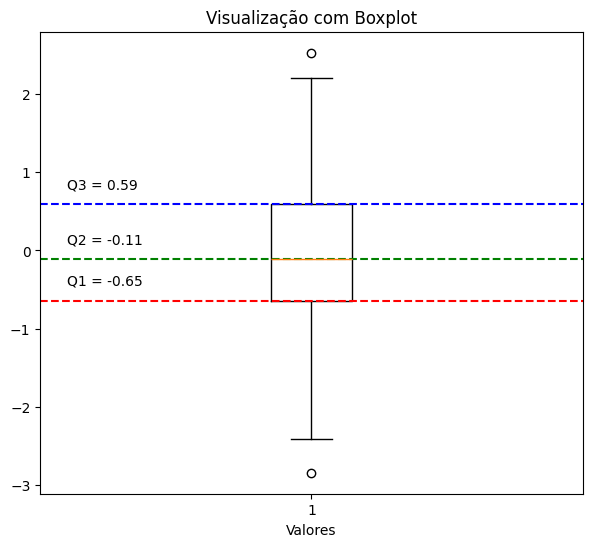

In [104]:
# Definindo o tamanho da figura
plt.figure(figsize=(7, 6))

# Definindo o título e os eixos
plt.title('Visualização com Boxplot')
plt.xlabel('Valores')

# Plotando o boxplot
plt.boxplot(k)

# Desenhando linhas nos quartis
plt.axhline(q1, color='r', linestyle='--')
plt.axhline(q2, color='g', linestyle='--')
plt.axhline(q3, color='b', linestyle='--')

# Escrevendo os valores dos quartis
plt.text(0.55, q1 + 0.2, f'Q1 = {round(q1, 2)}')
plt.text(0.55, q2 + 0.2, f'Q2 = {round(q2, 2)}')
plt.text(0.55, q3 + 0.2, f'Q3 = {round(q3, 2)}')

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

Documentação das principais funções utilizadas:
- [`pd.DataFrame.quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
- [`pd.DataFrame.boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

In [105]:
# Carregando o dataset
df = pd.read_csv('iris.csv')

df.info()  # Verificando as informações do dataset
df.head()  # Visualizando as primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [106]:
df[df["variety"] == "Versicolor"].quantile([0.25, 0.5, 0.75], numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.6,2.525,4.00,1.2
0.50,5.9,2.800,4.35,1.3
0.75,6.3,3.000,4.60,1.5


In [107]:
# Calculando os quartis
df.quantile([0.25, 0.5, 0.75], numeric_only=True)
# `numeric_only=True` para calcular apenas as colunas numéricas, caso contrário, 
# ocorrerá um erro por conta da coluna `variety` (string)

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


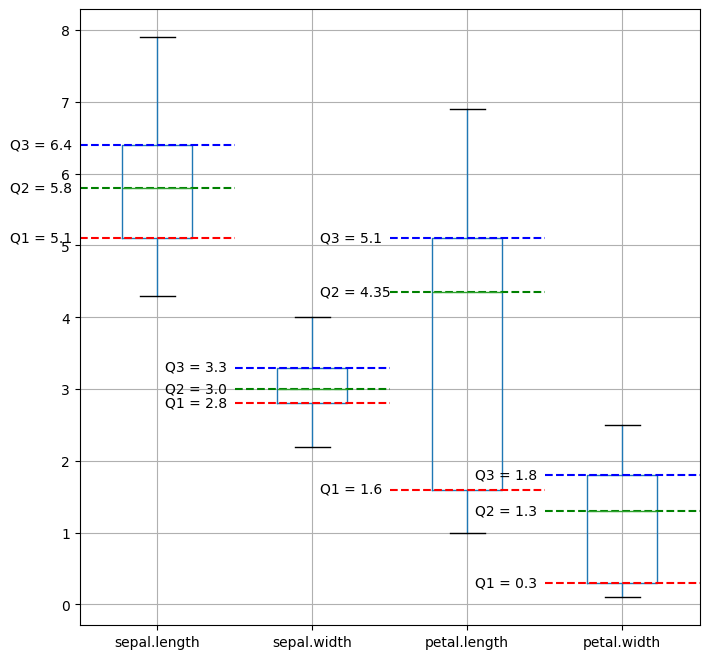

In [108]:
# Visualizando os quartis de todas as colunas usando boxplot
df.boxplot(figsize=(8, 8), showfliers=False)

# Desenhando linhas nos quartis de cada coluna
for i, col in enumerate(df.columns[:-1]):
    q = df[col].quantile([0.25, 0.5, 0.75])

    colors = ['r', 'g', 'b']
    for j, v in enumerate(q):
        # Desenhando linhas nos quartis
        plt.axhline(v, color=colors[j], linestyle='--', xmin=i * 0.25, xmax=(i + 1) * 0.25)
        
        # Escrevendo os valores dos quartis
        plt.text(i + 0.05, v - 0.05, f'Q{j + 1} = {round(v, 2)}')

plt.show()

# Decis

## A partir de um array

In [109]:
# Criando um array com 1000 valores aleatórios
k = np.random.normal(0, 1, 1000)

# Calculando os decis
quantile(k, np.arange(0.1, 1, 0.1))

,Quantis
10%,-1.211618
20%,-0.844819
30%,-0.509204
40%,-0.266979
50%,-0.037214
60%,0.247490
70%,0.524057
80%,0.800563
90%,1.246466


In [110]:
# Decis específicos
np.quantile(k, 0.3)

-0.5092035925173194

## A partir de uma fdt

In [111]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([4, 9, 11, 8, 5, 3]),
        start=50,
        end=74)
fdt

,f,rf,rf(%),cf,cf(%)
"[50.0, 54.0)",4,0.100,10.0,4,10.0
"[54.0, 58.0)",9,0.225,22.5,13,32.5
"[58.0, 62.0)",11,0.275,27.5,24,60.0
"[62.0, 66.0)",8,0.200,20.0,32,80.0
"[66.0, 70.0)",5,0.125,12.5,37,92.5
"[70.0, 74.0)",3,0.075,7.5,40,100.0


In [112]:
# Calculando os decis
quantile(fdt, np.arange(0.1, 1, 0.1))

,Quantis
10%,54.000000
20%,55.777778
30%,57.555556
40%,59.090909
50%,60.545455
60%,62.000000
70%,64.000000
80%,66.000000
90%,69.200000


## Visualização com Histograma

Documentação das principais funções utilizadas:
- [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

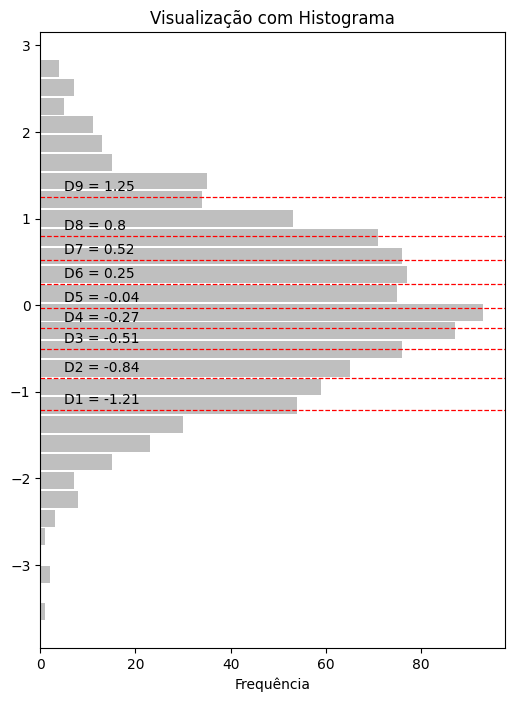

In [113]:
# Definindo o tamanho da figura
plt.figure(figsize=(6, 8))

# Definindo o título e os eixos
plt.title('Visualização com Histograma')
plt.xlabel('Frequência')

# Plotando o histograma
plt.hist(k, bins=30, orientation='horizontal', color='gray', alpha=0.5, rwidth=0.9)

# Desenhando linhas nos decis
d = np.quantile(k, np.arange(0.1, 1, 0.1))

for i, v in enumerate(d):
    plt.axhline(v, color='r', linestyle='--', linewidth=0.9)

    # Escrevendo os valores dos decis
    plt.text(x=5, y=v + 0.07, s=f'D{i+1} = {round(v, 2)}')

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

In [114]:
# O conjunto de dados utilizado será o `df` criado anteriormente

# Calculando os decis
df.quantile(np.arange(0.1, 1, 0.1), numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.1,4.80,2.50,1.40,0.20
0.2,5.00,2.70,1.50,0.20
0.3,5.27,2.80,1.70,0.40
0.4,5.60,3.00,3.90,1.16
0.5,5.80,3.00,4.35,1.30
0.6,6.10,3.10,4.64,1.50
0.7,6.30,3.20,5.00,1.80
0.8,6.52,3.40,5.32,1.90
0.9,6.90,3.61,5.80,2.20


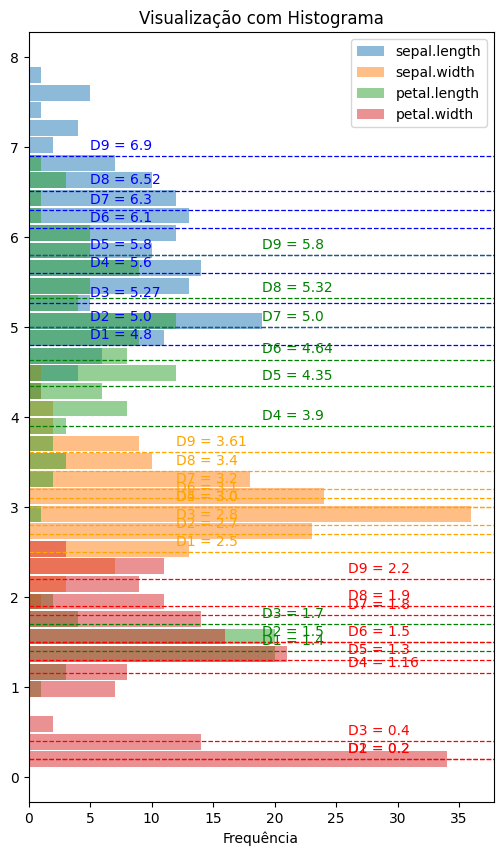

In [115]:
# Visualizando os decis de todas as colunas usando histograma na horizontal
df.plot.hist(figsize=(6, 10), bins=40, alpha=0.5, orientation='horizontal', rwidth=0.9)

# Definindo o título e os eixos
plt.title('Visualização com Histograma')
plt.xlabel('Frequência')

# Desenhando linhas nos decis de cada coluna com exceção da coluna `variety`
colors = ['blue', 'orange', 'green', 'red']
for i, col in enumerate(df.columns[:-1]):
    d = df[col].quantile(np.arange(0.1, 1, 0.1))

    # Desenhando linhas nos decis
    for j, v in enumerate(d):
        plt.axhline(v, color=colors[i], linestyle='--', linewidth=0.9)

        # Escrevendo os valores dos decis
        plt.text(x=7 * i + 5, y=v + 0.07, s=f'D{j+1} = {round(v, 2)}', color=colors[i])

plt.show()

# Percentis

## A partir de um array

In [116]:
# Criando um array com 1000 valores aleatórios
k = np.random.normal(0, 1, 1000)

# Todos os percentis
quantile(k, np.arange(0.01, 1, 0.01))

,Quantis
1%,-2.309304
2%,-2.005358
3%,-1.817051
4%,-1.684750
5%,-1.615242
...,...
95%,1.629178
96%,1.697360
97%,1.953995
98%,2.025039


In [117]:
# Percentis específicos
np.quantile(k, 0.92)

1.396313414047998

## A partir de uma fdt

In [118]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([5, 7, 4, 2, 2]),
        start=4,
        end=24)
fdt

,f,rf,rf(%),cf,cf(%)
"[4.0, 8.0)",5,0.25,25.0,5,25.0
"[8.0, 12.0)",7,0.35,35.0,12,60.0
"[12.0, 16.0)",4,0.20,20.0,16,80.0
"[16.0, 20.0)",2,0.10,10.0,18,90.0
"[20.0, 24.0)",2,0.10,10.0,20,100.0


In [119]:
# Calculando os percentis
quantile(fdt, np.arange(0.01, 1, 0.01))

,Quantis
1%,4.16
2%,4.32
3%,4.48
4%,4.64
5%,4.80
...,...
95%,22.00
96%,22.40
97%,22.80
98%,23.20


## Visualização com Gráfico de Linhas

Documentação das principais funções utilizadas:
- [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

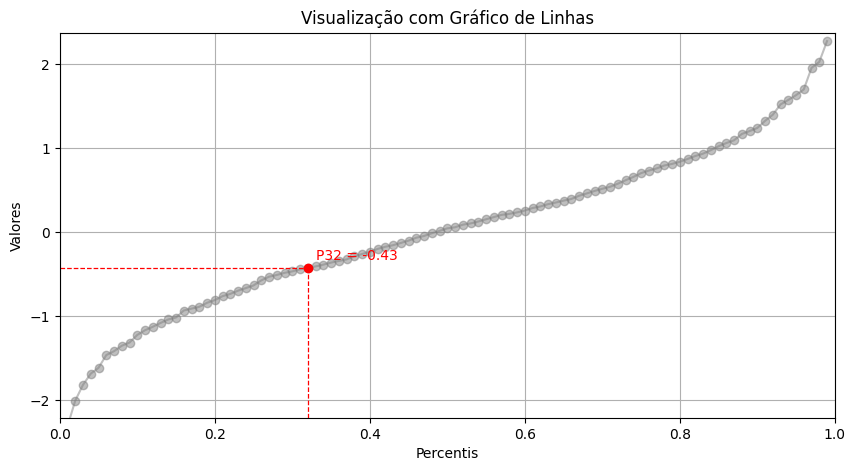

In [127]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 5))

# Definindo o título e os eixos
plt.title('Visualização com Gráfico de Linhas')
plt.xlabel('Percentis')
plt.ylabel('Valores')

# Plotando o gráfico dos percentis
plt.plot(np.arange(0.01, 1, 0.01), np.quantile(k, np.arange(0.01, 1, 0.01)), marker='o', alpha=0.5, color='gray')

# Definindo o limite do gráfico
ymin = np.quantile(k, 0.01) + 0.1
ymax = np.quantile(k, 0.99) + 0.1
plt.xlim(0, 1)
plt.ylim(ymin, ymax)

# Definindo o percentil que será destacado
p = float(input('Qual o percentil deseja destacar? (ENTER para escolher um aleatório): ') or np.random.randint(1, 99))

# Caso o usuário digite -1, um percentil aleatório será escolhido
if 1 > x > 99:
    raise ValueError('O percentil deve estar entre 1 e 99')

x = p / 100
y = np.quantile(k, x)

# Desenhando linhas no percentil
ysize = ymax - ymin
plt.axhline(y, color='r', linestyle='--', linewidth=0.9, xmin=0, xmax=x)
plt.axvline(x, color='r', linestyle='--', linewidth=0.9, ymin=0, ymax=(y - ymin) / ysize)

# Desenhando um ponto no percentil
plt.scatter(x, y, color='r', zorder=3)

# Escrevendo o valor do percentil
plt.text(x=x + 0.01, y=y + 0.1, s=f'P{round(x*100)} = {round(y, 2)}', color='r')

# Colocando grade no gráfico para facilitar a visualização
plt.grid()

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

In [121]:
# O conjunto de dados utilizado será o `df` criado anteriormente

# Calculando os percentis
df.quantile(np.arange(0.01, 1, 0.01), numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.01,4.400,2.200,1.149,0.100
0.02,4.400,2.200,1.200,0.100
0.03,4.547,2.300,1.300,0.147
0.04,4.600,2.300,1.300,0.200
0.05,4.600,2.345,1.300,0.200
...,...,...,...,...
0.95,7.255,3.800,6.100,2.300
0.96,7.408,3.804,6.108,2.304
0.97,7.653,3.900,6.353,2.400
0.98,7.700,4.002,6.602,2.402


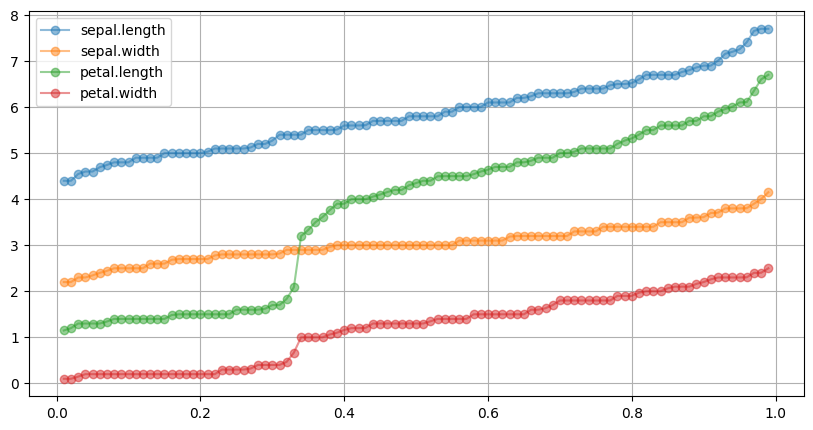

In [122]:
# Visualizando os percentis de todas as colunas usando gráfico de linhas
df.quantile(np.arange(0.01, 1, 0.01), numeric_only=True)\
    .plot(figsize=(10, 5), grid=True, marker='o', alpha=0.5)
plt.show()

# Fim!

Notebook criado por [Italo Seara](https://github.com/italoseara)